<a href="https://colab.research.google.com/github/chu-ise/411A-2022/blob/main/notebooks/07/01_bag_of_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bag of Words

## Preparing the environment

In [1]:
import gdown
import os
id = "14t4uoStGbRLMTu0GaNDt44UsbYs3Y4Ku"

data_file = "fomc_speech.csv"
gdown.download(id=id, output=data_file, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=14t4uoStGbRLMTu0GaNDt44UsbYs3Y4Ku
To: /content/fomc_speech.csv
100%|██████████| 30.3M/30.3M [00:00<00:00, 65.3MB/s]


'fomc_speech.csv'

In [2]:
import pandas as pd
df = pd.read_csv(data_file)
df.text = df.text.astype(str)
df.head()

,date,speaker,title,text,content_type
0,1996-06-13,Chairman Alan Greenspan,Bank supervision in a world economy,Remarks by Chairman Alan Greenspan Bank superv...,fomc_speech
1,1996-06-18,"Governor Edward W. Kelley, Jr.",Developments in electronic money and banking,"Remarks by Governor Edward W. Kelley, Jr. Deve...",fomc_speech
2,1996-09-08,Governor Laurence H. Meyer,Monetary policy objectives and strategy,Monetary Policy Objectives and Strategy\n\nI w...,fomc_speech
3,1996-09-19,Chairman Alan Greenspan,Regulation and electronic payment systems,Remarks by Chairman Alan Greenspan Regulation ...,fomc_speech
4,1996-10-02,Governor Lawrence B. Lindsey,Small business is big business,Remarks by Governor Lawrence B. Lindsey At the...,fomc_speech


# Tokenize

In [3]:
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
docs = df['text']
text = docs[0]
print(text[:100])

Remarks by Chairman Alan Greenspan Bank supervision in a world economy At the International Conferen


In [9]:
import re

def tokenize(text):
    text = re.sub(r"[^a-zA-Z0-9]", ' ', text.lower())
    words = text.split()
    #       remove stopwords and stem
    words = [w.strip() for w in words if w not in stopwords.words('english')]
    words = [stemmer.stem(w) for w in words]

    # Return final list of words
    return words


print(tokenize(text))


['remark', 'chairman', 'alan', 'greenspan', 'bank', 'supervis', 'world', 'economi', 'intern', 'confer', 'bank', 'supervisor', 'stockholm', 'sweden', 'june', '13', '1996', 'honor', 'present', 'william', 'taylor', 'memori', 'lectur', 'distinguish', 'group', 'senior', 'bank', 'supervisor', 'around', 'world', 'especi', 'delight', 'us', 'bill', 'wife', 'sharon', 'daughter', 'clair', 'visit', 'give', 'opportun', 'meet', 'bill', 'colleagu', 'appreci', 'great', 'import', 'work', 'opportun', 'know', 'bill', 'recal', 'dedic', 'bank', 'supervisor', 'outstand', 'public', 'servant', 'unit', 'state', 'certainli', 'fortun', 'lead', 'bank', 'supervisori', 'function', 'feder', 'reserv', 'fdic', 'u', 'bank', 'system', 'experienc', 'quit', 'difficult', 'time', 'individu', 'display', 'characterist', 'necessari', 'success', 'senior', 'bank', 'supervisor', 'better', 'bill', 'taylor', 'well', 'known', 'integr', 'tenac', 'profession', 'dedic', 'bill', 'demand', 'best', 'around', 'understood', 'safe', 'sound',

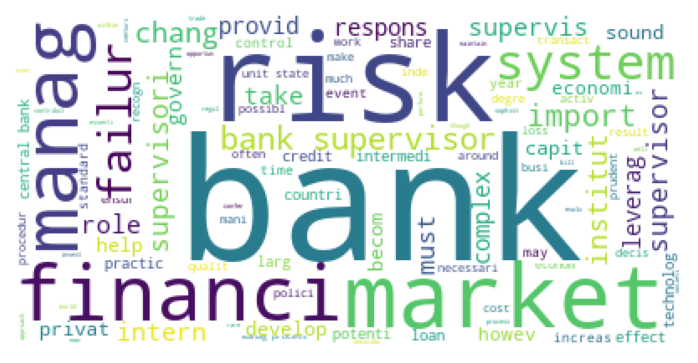

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from wordcloud import WordCloud

tokenized_text = " ".join(tokenize(text))

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=100)

# Generate and plot wordcloud
plt.imshow(wc.generate(tokenized_text))
plt.axis('off')
plt.show()

# BoW with CountVectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

docs = ['This movie is very scary and long',
        'This movie is not scary and is slow',
        'This movie is spooky and good']

vector = CountVectorizer()

print(vector.fit_transform(docs).toarray()) 

print('vocabulary :',vector.vocabulary_)

[[1 0 1 1 1 0 1 0 0 1 1]
 [1 0 2 0 1 1 1 1 0 1 0]
 [1 1 1 0 1 0 0 0 1 1 0]]
vocabulary : {'this': 9, 'movie': 4, 'is': 2, 'very': 10, 'scary': 6, 'and': 0, 'long': 3, 'not': 5, 'slow': 7, 'spooky': 8, 'good': 1}


In [51]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000)
fomc_count_DTM = cv.fit_transform(df.text[:10])
print(cv.get_feature_names_out()[:100])
print('vocabulary :', cv.vocabulary_)

['00' '000' '10' '11' '12' '1948' '1960s' '1970s' '1980' '1980s' '1989'
 '1992' '1994' '1995' '1996' '20' '50' 'ability' 'able' 'about' 'above'
 'abroad' 'absorb' 'acceleration' 'accept' 'acceptance' 'access'
 'accessibility' 'accompanied' 'accordingly' 'account' 'ach' 'across'
 'act' 'activities' 'actually' 'add' 'added' 'addition' 'additional'
 'address' 'adequate' 'adjusted' 'adopted' 'advance' 'advances' 'affect'
 'afford' 'after' 'again' 'against' 'aggregates' 'ago' 'ahead' 'alan'
 'alexander' 'all' 'alleged' 'allocated' 'allocation' 'allow' 'allowed'
 'almost' 'along' 'already' 'also' 'although' 'always' 'am' 'america'
 'american' 'americans' 'among' 'amount' 'an' 'analysis' 'and' 'annual'
 'another' 'any' 'appreciate' 'approach' 'appropriate' 'are' 'area'
 'areas' 'around' 'arrangements' 'array' 'as' 'assets' 'associated'
 'assume' 'assure' 'at' 'attention' 'attract' 'automated' 'availability'
 'available']
vocabulary : {'remarks': 740, 'by': 137, 'chairman': 155, 'alan': 54, 'g

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=1000, tokenizer=tokenize)
fomc_tfidf_DTM = cv.fit_transform(df.text[:10])
print(cv.get_feature_names_out()[:100])
print('vocabulary :', cv.vocabulary_)

['0' '00' '000' '1' '10' '11' '12' '1948' '1960' '1970' '1980' '1989'
 '1990' '1992' '1994' '1995' '1996' '2' '20' '21st' '235' '3' '4' '5' '50'
 '6' '7' '8' '9' 'abil' 'abl' 'abroad' 'absorb' 'acceler' 'accept'
 'access' 'accompani' 'accordingli' 'account' 'ach' 'achiev' 'across'
 'act' 'action' 'activ' 'actual' 'ad' 'adapt' 'add' 'addit' 'address'
 'adequ' 'adjust' 'adopt' 'advanc' 'advantag' 'affect' 'afford' 'aggreg'
 'ago' 'ahead' 'alan' 'alexand' 'alleg' 'alloc' 'allow' 'almost' 'along'
 'alreadi' 'also' 'altern' 'although' 'alway' 'america' 'american' 'among'
 'amount' 'analog' 'analysi' 'analyz' 'annual' 'anoth' 'answer' 'anticip'
 'appear' 'appli' 'applic' 'appreci' 'approach' 'appropri' 'area'
 'argument' 'aris' 'around' 'arrang' 'array' 'articl' 'ask' 'aspect'
 'assess']
vocabulary : {'remark': 765, 'chairman': 181, 'alan': 61, 'greenspan': 415, 'bank': 120, 'supervis': 897, 'world': 991, 'economi': 299, 'intern': 484, 'confer': 215, 'supervisor': 898, '1996': 16, 'honor': 4

In [24]:
print(repr(DTM))


<10x2625 sparse matrix of type '<class 'numpy.int64'>'
	with 6572 stored elements in Compressed Sparse Row format>


In [25]:
print(6572/(10*2625))

0.2503619047619048


In [26]:
for word, count in zip(cv.get_feature_names_out(), DTM[1].toarray()[0]):
    if count > 20:
        print(word, ':', count, end=', ')

bank : 41, electron : 31, feder : 22, new : 30, payment : 41, product : 25, reserv : 21, system : 24, 

# TF-IDF

In [33]:
from math import log
import pandas as pd
 
docs = ['This movie is very scary and long',
        'This movie is not scary and is slow',
        'This movie is spooky and good']
 
vocab = list(set(w for doc in docs for w in doc.split()))
vocab.sort()
print('vocab size :', len(vocab))
print(vocab)

vocab size : 11
['This', 'and', 'good', 'is', 'long', 'movie', 'not', 'scary', 'slow', 'spooky', 'very']


In [34]:
N = len(docs) 
 
def tf(t, d):
  return d.count(t)
 
def idf(t):
  df = 0
  for doc in docs:
    df += t in doc
  return log(N/(df+1))
 
def tfidf(t, d):
  return tf(t,d)* idf(t)

In [35]:
result = []

for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tf(t, d))
        
tf_vec = pd.DataFrame(result, columns = vocab)
tf_vec

,This,and,good,is,long,movie,not,scary,slow,spooky,very
0,1,1,0,2,1,1,0,1,0,0,1
1,1,1,0,3,0,1,1,1,1,0,0
2,1,1,1,2,0,1,0,0,0,1,0


In [36]:
result = []
for j in range(len(vocab)):
    t = vocab[j]
    result.append(idf(t))

idf_vec = pd.DataFrame(result, index=vocab, columns=["IDF"])
idf_vec

,IDF
This,-0.287682
and,-0.287682
good,0.405465
is,-0.287682
long,0.405465
movie,-0.287682
not,0.405465
scary,0.000000
slow,0.405465
spooky,0.405465


In [37]:
result = []
for i in range(N):
  result.append([])
  d = docs[i]
  for j in range(len(vocab)):
    t = vocab[j]
    result[-1].append(tfidf(t,d))

tfidf_vec = pd.DataFrame(result, columns = vocab)
tfidf_vec

,This,and,good,is,long,movie,not,scary,slow,spooky,very
0,-0.287682,-0.287682,0.000000,-0.575364,0.405465,-0.287682,0.000000,0.0,0.000000,0.000000,0.405465
1,-0.287682,-0.287682,0.000000,-0.863046,0.000000,-0.287682,0.405465,0.0,0.405465,0.000000,0.000000
2,-0.287682,-0.287682,0.405465,-0.575364,0.000000,-0.287682,0.000000,0.0,0.000000,0.405465,0.000000


# TfidfVectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

vector = CountVectorizer()
count_DTM = vector.fit_transform(docs)
print(count_DTM.toarray())
print(vector.vocabulary_)

[[1 0 1 1 1 0 1 0 0 1 1]
 [1 0 2 0 1 1 1 1 0 1 0]
 [1 1 1 0 1 0 0 0 1 1 0]]
{'this': 9, 'movie': 4, 'is': 2, 'very': 10, 'scary': 6, 'and': 0, 'long': 3, 'not': 5, 'slow': 7, 'spooky': 8, 'good': 1}


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer().fit(docs)
tfidf_DTM = tfidf_vec.transform(docs)
print(tfidf_DTM.toarray())
print(tfidf_vec.vocabulary_)

[[0.29628336 0.         0.29628336 0.50165133 0.29628336 0.
  0.38151877 0.         0.         0.29628336 0.50165133]
 [0.26359985 0.         0.5271997  0.         0.26359985 0.44631334
  0.3394328  0.44631334 0.         0.26359985 0.        ]
 [0.32052772 0.54270061 0.32052772 0.         0.32052772 0.
  0.         0.         0.54270061 0.32052772 0.        ]]
{'this': 9, 'movie': 4, 'is': 2, 'very': 10, 'scary': 6, 'and': 0, 'long': 3, 'not': 5, 'slow': 7, 'spooky': 8, 'good': 1}


# Cosine similarity

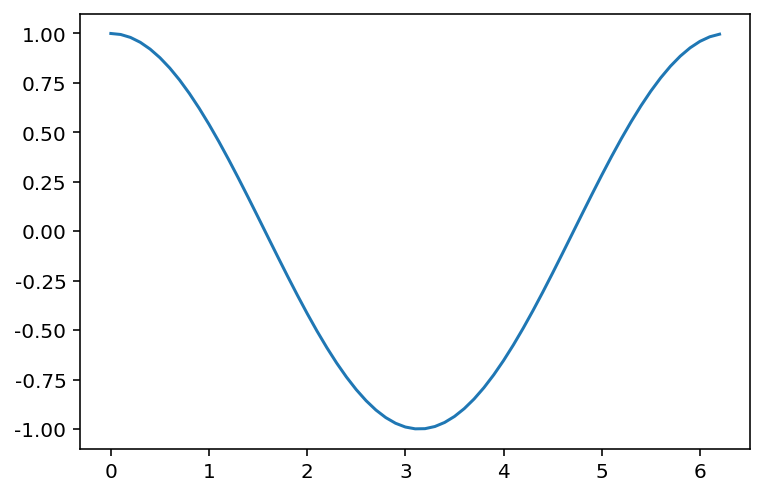

In [42]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

import numpy as np
x = np.arange(0,2*np.pi,0.1)
y = np.cos(x)
#print(x)
plt.plot(x, y)
plt.show()

In [47]:
from sklearn.metrics.pairwise import cosine_similarity

sim_result = cosine_similarity(count_DTM)
print(sim_result.shape)
sim_result

(3, 3)


array([[1.        , 0.71713717, 0.6172134 ],
       [0.71713717, 1.        , 0.64549722],
       [0.6172134 , 0.64549722, 1.        ]])

In [46]:
sim_result = cosine_similarity(tfidf_DTM)
print(sim_result.shape)
sim_result

(3, 3)


array([[1.        , 0.52000123, 0.37986812],
       [0.52000123, 1.        , 0.4224553 ],
       [0.37986812, 0.4224553 , 1.        ]])

In [53]:
fomc_tfidf_DTM.shape

(10, 1000)

In [54]:
sim_result = cosine_similarity(fomc_count_DTM)
print(sim_result.shape)
sim_result

(10, 10)


array([[1.        , 0.88677801, 0.83935501, 0.90409579, 0.87833459,
        0.94067213, 0.82078183, 0.9027862 , 0.86502595, 0.88382539],
       [0.88677801, 1.        , 0.86520319, 0.9307639 , 0.85364925,
        0.8845521 , 0.84827935, 0.90419813, 0.87917949, 0.87197455],
       [0.83935501, 0.86520319, 1.        , 0.86865081, 0.83820143,
        0.84437622, 0.86173064, 0.91783167, 0.91999569, 0.87823414],
       [0.90409579, 0.9307639 , 0.86865081, 1.        , 0.8709325 ,
        0.88624722, 0.86101723, 0.92125109, 0.89974832, 0.89413592],
       [0.87833459, 0.85364925, 0.83820143, 0.8709325 , 1.        ,
        0.86101453, 0.83433874, 0.90394991, 0.88203916, 0.88299689],
       [0.94067213, 0.8845521 , 0.84437622, 0.88624722, 0.86101453,
        1.        , 0.82112424, 0.89762107, 0.87517627, 0.86649246],
       [0.82078183, 0.84827935, 0.86173064, 0.86101723, 0.83433874,
        0.82112424, 1.        , 0.90476168, 0.8821664 , 0.87406753],
       [0.9027862 , 0.90419813, 0.9178316

In [55]:
sim_result = cosine_similarity(fomc_tfidf_DTM)
print(sim_result.shape)
sim_result

(10, 10)


array([[1.        , 0.48949729, 0.17298434, 0.59042891, 0.37288731,
        0.78775404, 0.20742371, 0.33907654, 0.23799999, 0.22351924],
       [0.48949729, 1.        , 0.24306659, 0.69811099, 0.32832345,
        0.48171302, 0.2636259 , 0.34465179, 0.32099075, 0.33911979],
       [0.17298434, 0.24306659, 1.        , 0.17457155, 0.17358138,
        0.19182555, 0.17702365, 0.35315279, 0.39296101, 0.25667982],
       [0.59042891, 0.69811099, 0.17457155, 1.        , 0.35371763,
        0.527377  , 0.28247317, 0.37154968, 0.30283111, 0.28886751],
       [0.37288731, 0.32832345, 0.17358138, 0.35371763, 1.        ,
        0.35640952, 0.2081462 , 0.39817878, 0.3923092 , 0.27493867],
       [0.78775404, 0.48171302, 0.19182555, 0.527377  , 0.35640952,
        1.        , 0.19406396, 0.31076438, 0.255355  , 0.28531306],
       [0.20742371, 0.2636259 , 0.17702365, 0.28247317, 0.2081462 ,
        0.19406396, 1.        , 0.27667182, 0.29115173, 0.25121579],
       [0.33907654, 0.34465179, 0.3531527